In [1]:
import nibabel as nib
from skimage.morphology import skeletonize, binary_dilation
import os
import matplotlib.pyplot as plt

def get_matched_ids(dirs, split_char="-"):
    """
    returns a sorted set of all ids that exist in all given dirs
    """
    files = [os.listdir(dir) for dir in dirs]
    file_ids = [[file.split(split_char)[0] for file in file_list] for
                file_list in files]
    sets = [set(file_id) for file_id in file_ids]
    matched = set.intersection(*sets)
    return sorted(matched)


def get_filepath_list_from_id(dir, id):
    dir_files = os.listdir(dir)
    out_paths = []
    for file in dir_files:
        if id in file:
            out_paths.append(os.path.join(dir, file))
    return out_paths


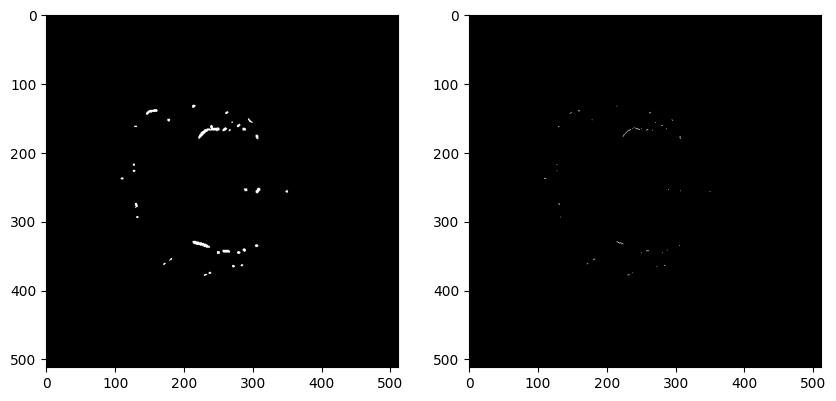

In [6]:
gt_dir = "/Users/asagilmore/src/temp/xlstm_inferance/IXI-costa/true_labels_costa"
pred_dir = "/Users/asagilmore/src/temp/xlstm_inferance/IXI-costa/xlstm_costa"
out_dir = "/Users/asagilmore/src/temp/feature_extraction"

ids = get_matched_ids([data_dir, seg_dir])

def get_skel_from_path(path):
    img = nib.load(path)
    data = img.get_fdata()
    data = data.astype(bool)
    skel = skeletonize(data, method='lee')
    skel = skel.astype(data.dtype)
    skel_img = nib.Nifti1Image(skel, img.affine, img.header)
    return skel_img

for id in ids:
    seg_path = get_filepath_list_from_id(seg_dir, id)[0]
    ori_path = get_filepath_list_from_id(data_dir, id)[0]

    seg_skel = get_skel_from_path(seg_path)
    ori_skel = get_skel_from_path(ori_path)

    nib.save(seg_skel, os.path.join(out_dir, f"{id}-predicted-skel.nii.gz"))
    nib.save(ori_skel, os.path.join(out_dir, f"{id}-ground-truth-skel.nii.gz"))

    break
